# Project 2 - Arctic ice maps

**Project deadline:** This project is due for submission on Wednesday, 25.05.2022, 23:59. Please check carefully the *About the Projects* section below for further details.

**Important:** You have the choice between two projects. This one has a scientific focus. In the other one, you can program a game and its focus is on elements of the `Python`-language and on programming techniques. We strongly advise you to read through both project notebooks completely before you take a decision.

## About the Projects
- You will get one project approximately every other week.
- Besides the homework-assignmentts, you need to solve the projects in order to pass the course. Your final course mark consists of the mean of your project marks. We aim to hand-out six projects during the term and we do not consider the worst project mark for your final course mark. Projects that you do not hand in are counted with a mark of 4.
- The project needs to be submitted by uploading this notebook to [Projects/Project 2](https://ecampus.uni-bonn.de/goto_ecampus_exc_2645968.html) on eCampus. You do not need to modify the notebooks name before your upload. Your project must be on eCampus by Wednesday, 25.05.2022, 23:59. **No late uploads can be accepted!**
- **In contrast to the homework exercises, each student must hand in an own solution for the projects! Of course you can and should discuss problems with each other! However, you need to be able to explain your solution in detail to your tutor and/or the lecturers! We might ask you for an interview about your project if the solution is (close to) identical to another students submission.**

**Note:** The tutors, Nina and I are very happy to help you out with difficulties you might have with the project tasks! You can ask questions any time but please do so well in advance of the deadlines!

## Introduction

The purpose of this project is to become familiar with working on image data, plotting it, and combining it in various ways for analysis. 

The data used in this problem set was/is collected by two different satellite missions. Involved are the AMSR-E instrument on the [Aqua](http://en.wikipedia.org/wiki/Aqua_%28satellite%29) satellite (data from 2002 to 2011) and the AMSR2 instrument on the [GCOM-W](https://suzaku.eorc.jaxa.jp/GCOM_W/) satellite (data from 2013 to-date). The data consist of maps of the concentration of ice in the Arctic collected between 2002 and 2019 with the exception of 2012. All the data were already downloaded and transformed for you to an easy-to-use format from [here](https://seaice.uni-bremen.de/start/data-archive/). As already stated in the frist project, one of the main issues to work on scientific data with Python is to first read them from various formats into `numpy`-arrays. We will come back to this issue in class but you do not need to worry about it here.

The data you should use are in the directory `/home/shared/Project_2/ice_data` within our online-system. This is actually a (small) subset of the complete satellite data set, with only two ice maps every month (some are missing though). You should explore yourself the original data if you are interested to work with the full data set. I am very happy to help you with that! Although we only work with a small subset of available ice-maps, we would like to ask you *not* to copy them to your private space within our system but to work with them at their current location. We would like to avoid multiplying 400MB more than 100 times! If you would like to use the data on your own computer, there is a `tar`-archive at `/home/shared/Project_2/ice_data_2022.tgz`.

The data is in `numpy` format, which means that you can read it as a `numpy`-array using:

    >>> import numpy as np
    >>> data = np.load('/home/shared/Project_2/ice_data/20080415.npy')

which will give you a 2-d array. Just for information, this was created with:

    >>> np.save('ice_data/20080415.npy', data)
    
where `data` was a 2-d `numpy`-array that was extracted from the original data set.

**Note:** There is an ice-map for each first and each 15th of a month from the years 2003-2011 and 2013-2021 (a small amount of data is missing). For instance, the file `20080415.npy` represents data for the 15th of April 2008.

## Task 1 - getting familiar with the data and examining a single map 

**Please put the solution of this and the other tasks at the end of this notebook! You will submit the modified notebook to eCampus.**

Start off by reading in some  map as shown above, and plot it with Matplotlib (look up the `plt.imshow`-function). Note that to get the correct orientation, you will need to call the ``imshow`` command with the ``origin='lower'`` option, which ensures that the (0,0) pixels is on the bottom left, not the top left. You can try and use different colormaps if you like (set by the ``cmap`` option) - see [here](https://matplotlib.org/3.2.1/tutorials/colors/colormaps.html) (scroll down on the page) for information on the available colormaps. You can specify a colormap to use with e.g. ``cmap=plt.cm.jet`` (i.e. ``cmap=plt.cm.`` followed by the name of the colormap). Note that you can make figures larger by specifying e.g.

    >>> plt.figure(figsize=(8,8))

where the size is given in inches. Try and find a way to plot a colorbar on the side, to show what color corresponds to what value. Remember that you can always look at the [Matplotlib Gallery](http://matplotlib.org/gallery.html) to find example plots for each `matplotlib`-feature. You can also try and remove the tick labels (``100``, ``200``, etc.) since they are not useful - but don't worry if you can't figure out how.

**Remarks:** (1) When you explore the data-values, you will notice that they contain numbers from 0 to 100. A value of 50 means that 50% of the area occupied by the corresponding pixel are covered with ice. A value of zero means that the complete pixel is covered with water; (2) Besides the numbers, a good deal of the pixels contains the special value `nan` (not a number). These are areas covered by land. Functions like `imshow` automatically ignore these values and do not produce an error. If you intend to do numerical calculations (`numpy`) with pixels that have a `nan`-value, the result is `nan` again by default. To ignore `nan`-values for building sums etc., you would need to use functions as `np.nansum` instead of `np.sum` etc.

I show below the result I obtain for this step (one winter and one summer map).
<img src="figs/ice_winter_summer.png" style="height: 300px;">

## Task 2 - reading in and examining multiple maps 

We now want to make a plot of the ice concentration over time. Reading in a single map is easy, but since we have more than 350 maps, we do not want to read them all in individually by hand. Write a loop over all the available files, and inside the loop, read in the data to a variable (e.g. ``data``), and also extract the year, month, and day as integer values (e.g. ``year``, ``month``, and ``day``) from the filename. Then, also inside the loop, construct an array ``times`` which is essentially the fractional time in years. You can assume for simplicity that each month has 30 days and each year has 360 days - this will not affect the results later. As an example, in the year 2003, you would put the 1st of January as $2003.00$, the 2nd of January as $2003 + \frac{1}{360}\approx 2003.033$ and the 1st of February as $2003 + \frac{1}{12}\approx 2003.083$ into the `times`-array. Finally, also compute for each file the total number of pixels that have a value above 50% ice. Put also those values into an array. After the loop, make a plot of the number of pixels with a concentration above 50% against time.

**Hint:** To loop over files, I showed you the `glob`-module in lecture. Make sure that the filenames are *sorted* by name and hence also sorted in time. 

We now want something a little more quantitative than just the number of pixels, so we will try and compute the area where the ice concentration is above a given threshold. However, we first need to know the area of the pixels in the image, and since we are looking at a projection of a spherical surface, each pixel will be a different area. The areas (in km$^{2}$) are contained inside the file named ``ice_data_area.npy`` (within the `/home/shared/Project_2` directory). Read in the areas and make a plot (with colorbar) to see how the pixel area is changing over the image.

Now, loop over the files again as before, but this time, for each file, compute the total area where the concentration of ice is 99% or above. Make a new plot showing the area of >99% ice concentration against time. Also plot the *total area* covered by ice as a function of time.

Describe what you see - how does the minimum value within each year change over time?

## Task 3 - visualizing changes over time; does the amount of ice decrease?

In the following we always work with the *total area* covered by ice from the previous task. 

Find the date at which the area of the region covered with ice is the smallest. What is the value of the minimum area?

**Hint:** Have a look at the `np.argmin` function.

Next, read in the map for this minimum, and the map for the same day and month but from 2003. Make a side-by-side plot showing the two ice-concentrations.

Compute the difference between the two maps so that a loss in ice over time will correspond to a negative value, and a gain in ice will correspond to a positive value. Make a plot of the difference, and use the ``RdBu`` colormap to highlight the changes (include a colorbar).

**Hint:** To make a plot with different sub-figures, check out the `plt.subplot` function.

Finally, plot the `mean` ice concentrations of the years 2004-2006 over the months January to December and compare it to the mean over the years 2019-2021. What was the loss of the ice over the past 15 years at the minimum values?

**Hint:** I showed you in the lecture how to easily do this when converting corresponding data to 2d `numpy`-arrays.

## Epilogue

The data that we have here cover the past twenty years and it is worth noting that the minimum ice coverage you found here was a record minimum - never before (in recorded history) had the size of the ice shelf been so small. This is part of a long term trend due to global warming. Many scientists believe that by ~2050, the Arctic will be completely ice-free for at least part of the summer.

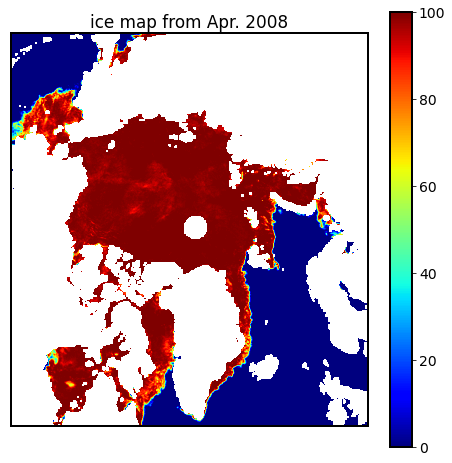

In [1]:
# importing relevant packages
import numpy as np
import os # importing to get the path to data folder 
import matplotlib.pyplot as plt
import glob
import matplotlib.cm as cm


# for prettier plots 
plt.rcParams['font.size'] = 14
plt.rcParams['axes.linewidth'] = 2.0
plt.rcParams['figure.figsize'] = (8, 8)

'''
importing the data, where os.getcwd() gets
the current working directory. This is useful 
as I am working on this project on my local device.
'''
data = np.load(os.getcwd() + '/data/ice_data/20080415.npy')

# plotting
plt.imshow(data, origin='lower', cmap=plt.cm.jet)
plt.title('ice map from Apr. 2008')
plt.colorbar()
plt.xticks([]) # for no x-ticks 
plt.yticks([]) # for no y-ticks
plt.show()

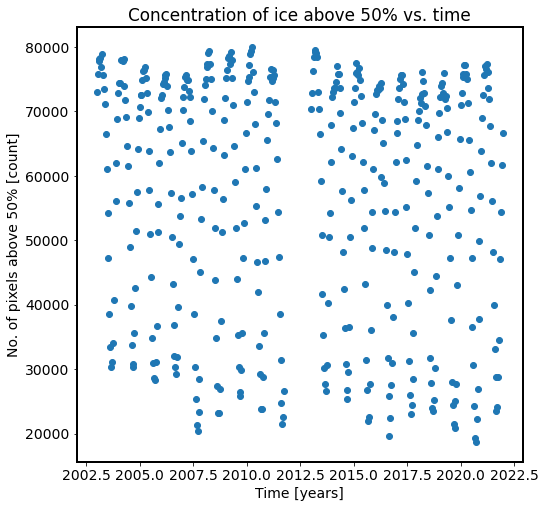

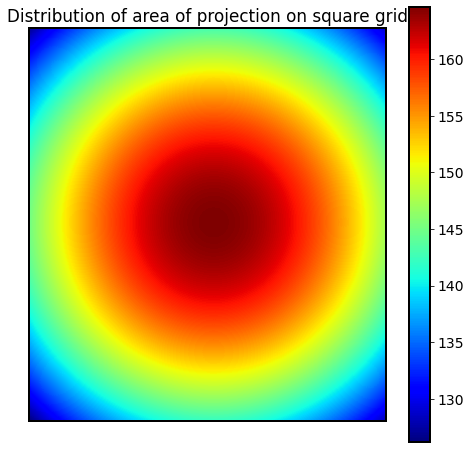

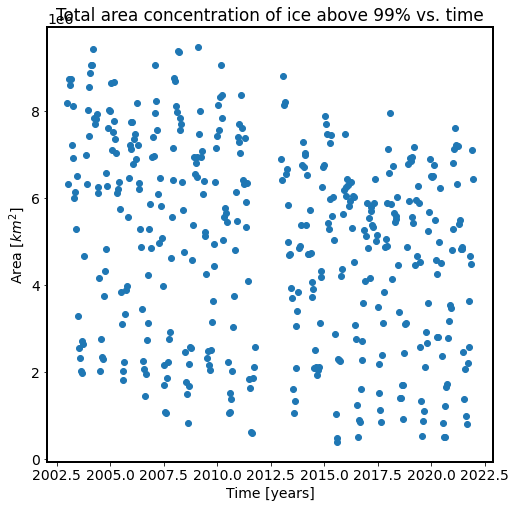

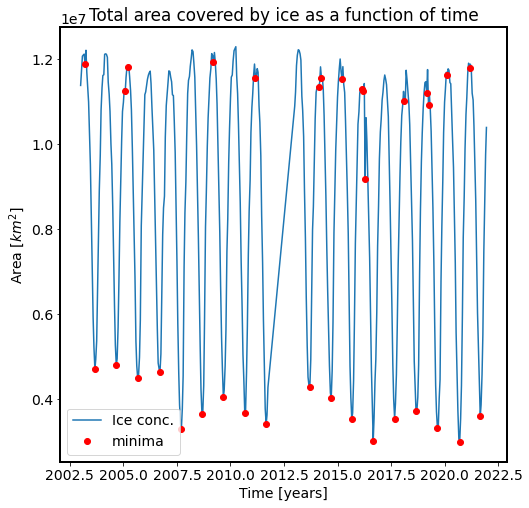

In [3]:
# importing all the data 
all_data = glob.glob("./data/ice_data/*")
all_data.sort() # sorting by name 

data_area = np.load(os.getcwd() + '/data/ice_data_area.npy')

# declaring all the arrays and variables 
year = np.empty(len(all_data))
month = np.empty(len(all_data))
day = np.empty(len(all_data))
times = np.empty(len(all_data))
fifty_plus = np.empty(len(all_data))
nn_plus = np.empty(len(all_data))
tot_ice = np.empty(len(all_data))
i = 0

# for getting year, month, day and times so that
# we don't need to get it again 
for name in all_data: 
    data = np.load(name)
    year[i] = int(name[16:20])
    month[i] = int(name[20:22])
    day[i] = int(name[22:24])
    times[i] = year[i] + ((day[i] - 1) / 360) + ((month[i] - 1) / 12)
    i = i + 1
    
'''
Now computing the number of pixels 
above 50%, above 99% and total ice 
in one loop
'''
i = 0
for name in all_data: 
    data = np.load(name)
    mask = data > 50
    data[mask] = 1 # normalizing the data
    fifty_plus[i] = np.sum(data[mask])
    
    data = np.load(name)
    mask = data > 99
    nn_plus[i] = np.nansum((data[mask] / 100) * data_area[mask]) # dividing by 100 because value is in %
    
    data = np.load(name)
    tot_ice[i] = np.nansum((data / 100) * data_area)
    
    i = i + 1
    

# plotting for 55% plus
plt.plot(times, fifty_plus, 'o')
plt.title('Concentration of ice above 50% vs. time')
plt.xlabel('Time [years]')
plt.ylabel('No. of pixels above 50% [count]')
plt.show()

# reading data from the area file
data_area = np.load(os.getcwd() + '/data/ice_data_area.npy')

# plotting the area plot 
plt.imshow(data_area, origin = 'lower', cmap = plt.cm.jet)
plt.title("Distribution of area of projection on square grid")
plt.colorbar()
plt.xticks([])
plt.yticks([])
plt.show()

# plotting for 99% plus
plt.plot(times, nn_plus, 'o')
plt.title('Total area concentration of ice above 99% vs. time')
plt.xlabel('Time [years]')
plt.ylabel('Area [$km^2$]')
plt.show()

# plotting for total ice 
plt.plot(times, tot_ice, label = 'Ice conc.')

# calculating all the local minima 
'''
The +1 at the end is because np.where is 
finding the indices in y[1:-1] and not the entire array. 
The [0] is because np.where returns a tuple and 
we are interested only in the first element of the array.
'''
y = tot_ice
b = np.where((y[1:-1] <= y[:-2]) & (y[1:-1] <= y[2:]))[0] + 1
plt.plot(times[b], y[b], 'o', color='red', label="minima")
plt.title('Total area covered by ice as a function of time')
plt.xlabel('Time [years]')
plt.ylabel('Area [$km^2$]')
plt.legend()
plt.show()

As it can be seen from the plots above, the minima of the ice percentage for various concetration percentages has reduced as a function of time. In the last plot we see the all local minima plotted on top of our figures and a clear downward trend in the ice concentration can be seen.

---

The date at which there was lowest ice cover was 15.9.2020 
 The value of the minimum area was 2995844.313505718 km^2


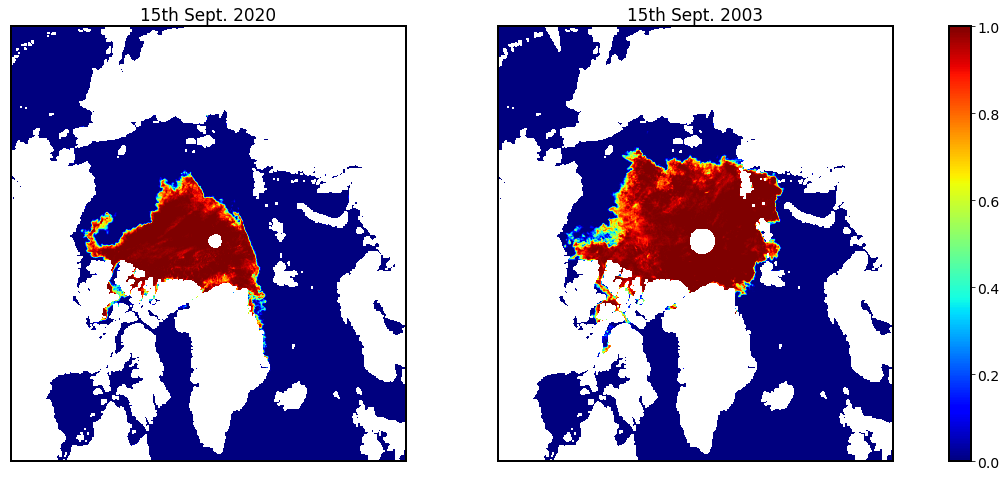

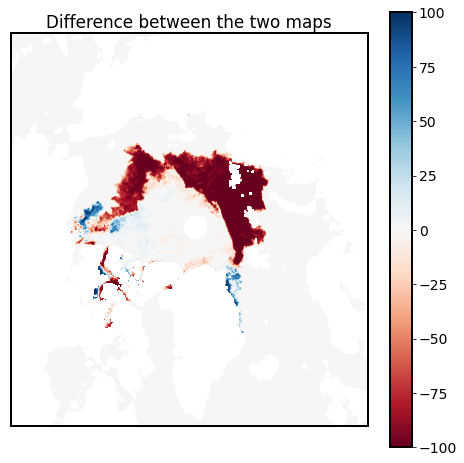

In [4]:
# getting the minimum value 
min_ice = np.argmin(tot_ice)
print('The date at which there was lowest ice cover was %d.%d.%d' %(day[min_ice], month[min_ice], year[min_ice]), '\n',
      'The value of the minimum area was', tot_ice[min_ice], 'km^2')

data_min = np.load(os.getcwd() + '/data/ice_data/20200915.npy')
data_2003 = np.load(os.getcwd() + '/data/ice_data/20030915.npy')

# plotting with subplots()
fig, ax = plt.subplots(1, 2)
fig.set_size_inches( 20, 8)
cmap = cm.get_cmap('jet')
im = cm.ScalarMappable(cmap =cmap)    
ax[0].imshow(data_min, cmap=cmap, origin="lower")
ax[0].get_xaxis().set_visible(False)
ax[0].get_yaxis().set_visible(False)
ax[0].set_title('15th Sept. 2020')
ax[1].imshow(data_2003, cmap=cmap, origin="lower")
ax[1].get_xaxis().set_visible(False)
ax[1].get_yaxis().set_visible(False)
ax[1].set_title('15th Sept. 2003')
plt.colorbar(im, ax =ax.ravel().tolist())
plt.show()

# plotting the difference of two maps 
plt.imshow(data_min - data_2003, origin = 'lower', cmap = 'RdBu')
plt.title('Difference between the two maps')
plt.colorbar()
plt.xticks([])
plt.yticks([])
plt.show()

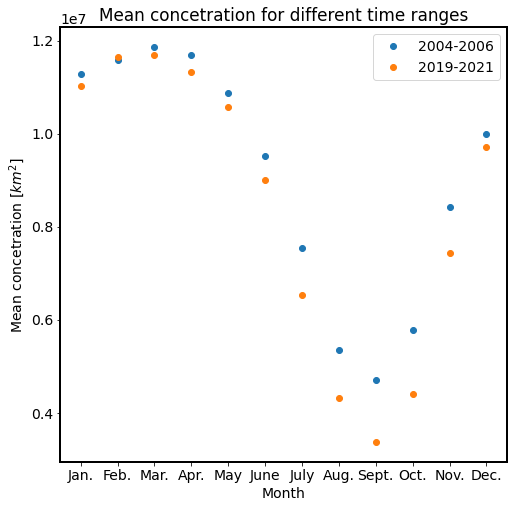

The loss in the minima over 15 years is 1324088.7049067304 km^2


In [5]:
def avg_func(y_min, y_max, tot_ice):
    '''
    Function to compute the average for the 
    given time range in years and the total ice
    array. 
    It returns the computed average value corresponding to 
    each month in that duration'''
    tot_sum = np.zeros(int(12 * (y_max - y_min)))
    i = y_min
    while i <= y_max:
        tot_sum = tot_sum + tot_ice[(times >= i) & (times < i + 1)]
        i = i + 1
    tot_mean = np.array([np.sum(tot_sum[j:j+2]) for j in range(0, np.size(tot_sum), 2)]) / 6
    return tot_mean 

avg1 = avg_func(2004, 2006, tot_ice)
avg2 = avg_func(2019, 2021, tot_ice)

# defining the month array 
month_name = ['Jan.', 'Feb.', 'Mar.', 'Apr.', 'May', 'June', 'July', 'Aug.', 'Sept.', 'Oct.', 'Nov.', 'Dec.']

# plotting the average for 2 durations 
plt.plot(month_name, avg1, 'o', label = '2004-2006')
plt.plot(month_name, avg2, 'o', label = '2019-2021')
plt.title('Mean concetration for different time ranges')
plt.xlabel('Month')
plt.ylabel('Mean concetration [$km^2$]')
plt.legend()
plt.show()

# printing the difference in minima
print('The loss in the minima over 15 years is %s km^2' %(np.min(avg1) - np.min(avg2)))